<a href="https://colab.research.google.com/github/jwkanggist/EverybodyTensorflow2.0/blob/master/lab13_cnn_pool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB13 Pooling over CNN
Pooling 함수를 사용해서 필터링 해보자

In [1]:
# preprocessor parts

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow.compat.v1 as tfv1
tfv1.disable_eager_execution()

from tensorflow.keras.callbacks import TensorBoard
from sklearn.datasets import load_sample_image

import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

from datetime import datetime


TensorFlow 2.x selected.


In [0]:
# load images
china   = load_sample_image("china.jpg")
flower  = load_sample_image("flower.jpg")
dataset = np.array([china,flower],dtype=np.float32)

# load images data set size
batch_size,height, width, channels = dataset.shape


In [0]:
# Creat a graph with with input X plus a convolutional layer
# applying the 2 filter defined above
X = tfv1.placeholder(tfv1.float32, shape=[None, height, width, channels],name='input')

stride = 4
tile_size = 4
# prediction CNN with two filters and input X
# X is the input mini-batch
# 4 X 4 tiny kernel is used for max pooling: ksize=[batch_size=1,height=4,width=4,channels=1]
# padding = 'VAILD', which means the conv layer does not use zero padding
pooling_output = tfv1.nn.max_pool(X,ksize=[1,tile_size,tile_size,1],strides=[1,stride,stride,1],padding='VALID')

with tfv1.Session() as sess:
    output = sess.run(pooling_output,feed_dict= {X:dataset})

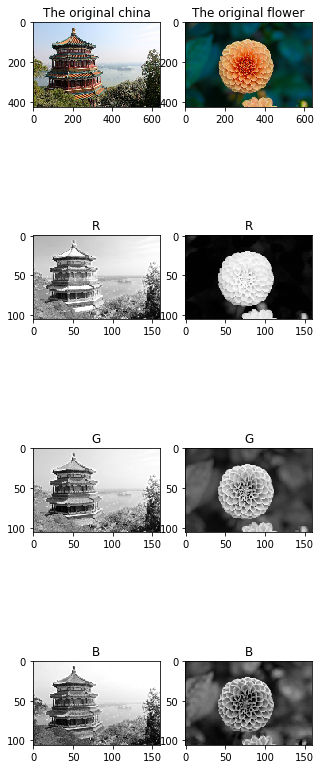

In [6]:
hfig = plt.figure(1,figsize=(5,15))
plt.subplot(4,2,1)
plt.imshow(china)
plt.title('The original china')

plt.subplot(4,2,2)
plt.imshow(flower)
plt.title('The original flower')

plt.subplot(4,2,3)
plt.imshow(output[0,:,:,0], cmap='gray')
plt.title('R')

plt.subplot(4,2,4)
plt.imshow(output[1,:,:,0], cmap='gray')
plt.title('R')

plt.subplot(4,2,5)
plt.imshow(output[0,:,:,1], cmap='gray')
plt.title('G')

plt.subplot(4,2,6)
plt.imshow(output[1,:,:,1], cmap='gray')
plt.title('G')

plt.subplot(4,2,7)
plt.imshow(output[0,:,:,2], cmap='gray')
plt.title('B')

plt.subplot(4,2,8)
plt.imshow(output[1,:,:,2], cmap='gray')
plt.title('B')

plt.show()